In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

csv1 = "raw_data/city_data.csv"
csv2 = "raw_data/ride_data.csv"
df1 = pd.read_csv(csv1)
df2 = pd.read_csv(csv2)

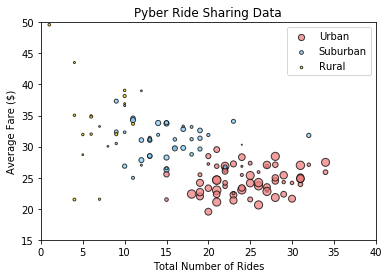

In [2]:
df_rides = df2.groupby("city").count()
df_rides = pd.DataFrame(df_rides["date"])
df_ttl_rides = df_rides.rename(columns={"date":"Total Number of Rides"})

df_avg_fares = pd.DataFrame(df2.groupby("city").mean()["fare"])
df_avg_fares = df_avg_fares.rename(columns={"fare":"Average Fare ($)"})


df_drivers = df1.iloc[:,[0,1]]
df_drivers = df_drivers.set_index("city")

city_type = df1.iloc[:,[0,2]]
city_type = city_type.set_index("city")
city_type

#CONSOLIDATED TABLE FOR PLOTTING
result1 = pd.merge(pd.merge(pd.merge(df_avg_fares, df_ttl_rides,left_index=True,right_index=True),df_drivers,left_index=True,right_index=True),city_type,left_index=True,right_index=True).rename(columns={"driver_count":"Total Number of Drivers"})
#result1 = result1.style.format({"Average Fare ($)": lambda x: "${:,.2f}".format(x)})
result1 = result1.reset_index(level=['city'])

x_axis_urban = result1["Total Number of Rides"][result1.type=="Urban"]
y_axis_urban = result1["Average Fare ($)"][result1.type=="Urban"]
s_urban = result1["Total Number of Drivers"][result1.type=="Urban"]
plt.scatter(x_axis_urban, y_axis_urban, marker="o", facecolors="lightcoral", edgecolors="black",s=s_urban, alpha=0.75, label="Urban")

x_axis_suburban = result1["Total Number of Rides"][result1.type=="Suburban"]
y_axis_suburban = result1["Average Fare ($)"][result1.type=="Suburban"]
s_suburban = result1["Total Number of Drivers"][result1.type=="Suburban"]
plt.scatter(x_axis_suburban, y_axis_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",s=s_suburban, alpha=0.75, label="Suburban")

x_axis_rural = result1["Total Number of Rides"][result1.type=="Rural"]
y_axis_rural = result1["Average Fare ($)"][result1.type=="Rural"]
s_rural = result1["Total Number of Drivers"][result1.type=="Rural"]
plt.scatter(x_axis_rural, y_axis_rural, marker="o", facecolors="gold", edgecolors="black",s=s_rural, alpha=0.75, label="Rural")
plt.legend(loc="best")
plt.ylim(15, 50)
plt.xlim(0, 40)

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.show()

In [3]:
df_ttl_fares = pd.DataFrame(df2.groupby("city").sum()["fare"])

#.rename(columns={"driver_count":"Total Number of Drivers"})

result2 = pd.merge(pd.merge(pd.merge(df_ttl_fares, df_ttl_rides,left_index=True,right_index=True),df_drivers,left_index=True,right_index=True),city_type,left_index=True,right_index=True)
result2 = result2.rename(columns={"type":"City Type"}).reset_index(level=['city'])

In [4]:
result2 = result2.loc[:,["fare","Total Number of Rides","driver_count","City Type"]]
#ttl_rides = result2["Total Number of Rides"].sum()
#ttl_drivers = result2["driver_count"].sum()
#ttl_fare = result2["fare"].sum()

In [5]:
result3 = result2.groupby("City Type").sum()
result3 = result3.rename(columns={"fare": "fare_pc","Total Number of Rides": "ride_pc","driver_count": "driver_pc"})
result3 = result3.reset_index()
labels = result3["City Type"]
explode = (0, 0, 0.1)

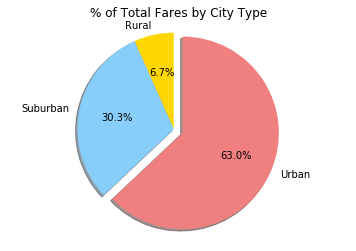

In [6]:
#result3["fare_pc"] = result3.fare/ttl_fare
#result3["ride_pc"] = result3["Total Number of Rides"]/ttl_rides
#result3["driver_pc"] = result3.driver_count/ttl_drivers
#result_pc = result3[["fare_pc","ride_pc","driver_pc"]]
colors = ["gold", "lightskyblue","lightcoral"]
size_pc1 = result3["fare_pc"] 
size_pc2 = result3["ride_pc"] 
size_pc3 = result3["driver_pc"] 
plt.pie(size_pc1, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()


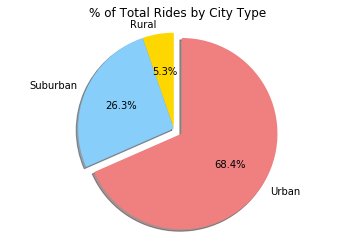

In [7]:
plt.pie(size_pc2, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()


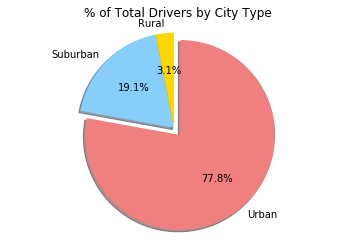

In [8]:
plt.pie(size_pc3, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()